In [43]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.linalg import eigh
from sklearn.metrics import accuracy_score

2.

In [44]:

def my_spectralclustering(data, K, sigma):
    # 1. Create Affinity Matrix using Gaussian Kernel
    pairwise_distances = cdist(data, data, 'euclidean')
    affinity_matrix = np.exp(-pairwise_distances ** 2 / (2 * sigma ** 2))
    
    # 2. Calculate the Laplacian Matrix
    diagonal_matrix = np.diag(np.sum(affinity_matrix, axis=1))
    laplacian_matrix = diagonal_matrix - affinity_matrix
    
    # 3. Extract the first K eigenvectors
    eigenvalues, eigenvectors = eigh(laplacian_matrix)
    features = eigenvectors[:, :K]
    
    # 4. Use these eigenvectors as features to cluster data points using K-means
    labels = my_kmeans(features, K)
    
    return labels

1.

In [45]:
def my_kmeans(data, K):
    # Initialize centroids by picking K random samples from the data
    centroids = data[np.random.choice(data.shape[0], K, replace=False)]
    
    labels = np.zeros(data.shape[0], dtype=int)
    while True:
        # Assign each data point to the closest centroid
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        new_labels = np.argmin(distances, axis=1)

        # If labels don't change, we've reached convergence
        if np.array_equal(labels, new_labels):
            break

        labels = new_labels

        # Update the centroids
        for k in range(K):
            centroids[k] = np.mean(data[labels == k], axis=0)

    return labels

In [46]:
def plot_clustering(data, labels, dataset_name):
    # Get the number of unique clusters
    unique_labels = np.unique(labels)
    colors = plt.cm.jet(np.linspace(0, 1, len(unique_labels)))

    plt.figure(figsize=(10, 6))
    for i, label in enumerate(unique_labels):
        cluster_data = data[labels == label]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], color=colors[i], label=f"Cluster {label}", s=20)

    plt.title(f"Clustering results for {dataset_name}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(loc="best")
    plt.grid(True)
    
    # Save the figure to a file before displaying it
    file_name = dataset_name.split('.')[0] + "_clustering_result.png"
    plt.savefig(file_name, dpi=300, bbox_inches='tight')
    
    plt.show()


In [47]:
def plot_side_by_side(data, labels_kmeans, labels_spectral, dataset_name):
    unique_labels_kmeans = np.unique(labels_kmeans)
    unique_labels_spectral = np.unique(labels_spectral)

    colors = plt.cm.jet(np.linspace(0, 1, max(len(unique_labels_kmeans), len(unique_labels_spectral))))

    plt.figure(figsize=(15, 6))

    # K-means clustering plot
    plt.subplot(1, 2, 1)
    for i, label in enumerate(unique_labels_kmeans):
        cluster_data = data[labels_kmeans == label]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], color=colors[i], label=f"Cluster {label}", s=20)
    plt.title(f"K-means Clustering for {dataset_name}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(loc="best")
    plt.grid(True)

    # Spectral clustering plot
    plt.subplot(1, 2, 2)
    for i, label in enumerate(unique_labels_spectral):
        cluster_data = data[labels_spectral == label]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], color=colors[i], label=f"Cluster {label}", s=20)
    plt.title(f"Spectral Clustering for {dataset_name}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(loc="best")
    plt.grid(True)
    
    # Save the figure to a file before displaying it
    file_name = dataset_name.replace(" ", "_") + "_clustering_results.png"
    plt.savefig(file_name, dpi=300, bbox_inches='tight')
    
    plt.tight_layout()
    plt.show()

In [48]:
def Run_clustering(datasets, sigma_values):
    results_kmeans = {}
    results_spectral = {}
    
    for dataset, sigma in zip(datasets, sigma_values):
        # Load data from the .mat file
        data = scipy.io.loadmat(dataset)["D"]
        K = len(np.unique(scipy.io.loadmat(dataset)["L"]))

        # Cluster using K-means
        labels_kmeans = my_kmeans(data, K)
        results_kmeans[dataset] = labels_kmeans

        # Cluster using Spectral Clustering
        labels_spectral = my_spectralclustering(data, K, sigma)
        results_spectral[dataset] = labels_spectral
        
        # Plot results side by side
        dataset_name = dataset.split('.')[0]
        plot_side_by_side(data, labels_kmeans, labels_spectral, dataset_name)

    return results_kmeans, results_spectral

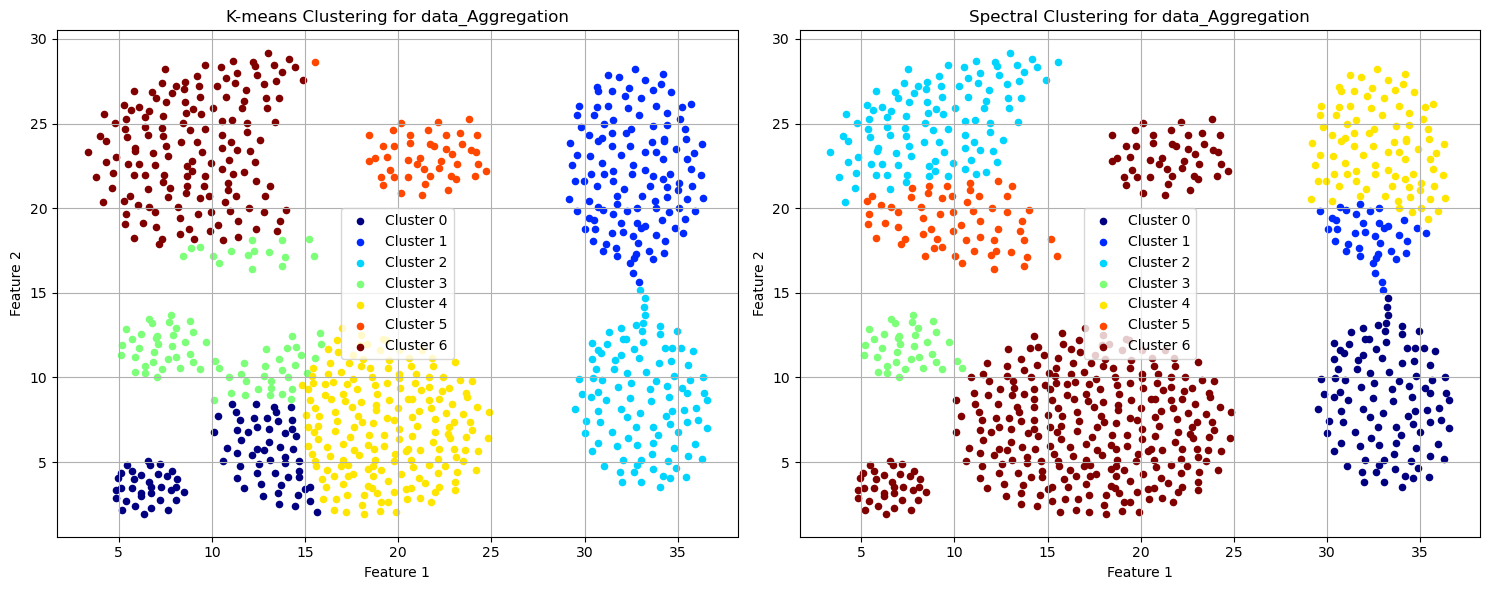

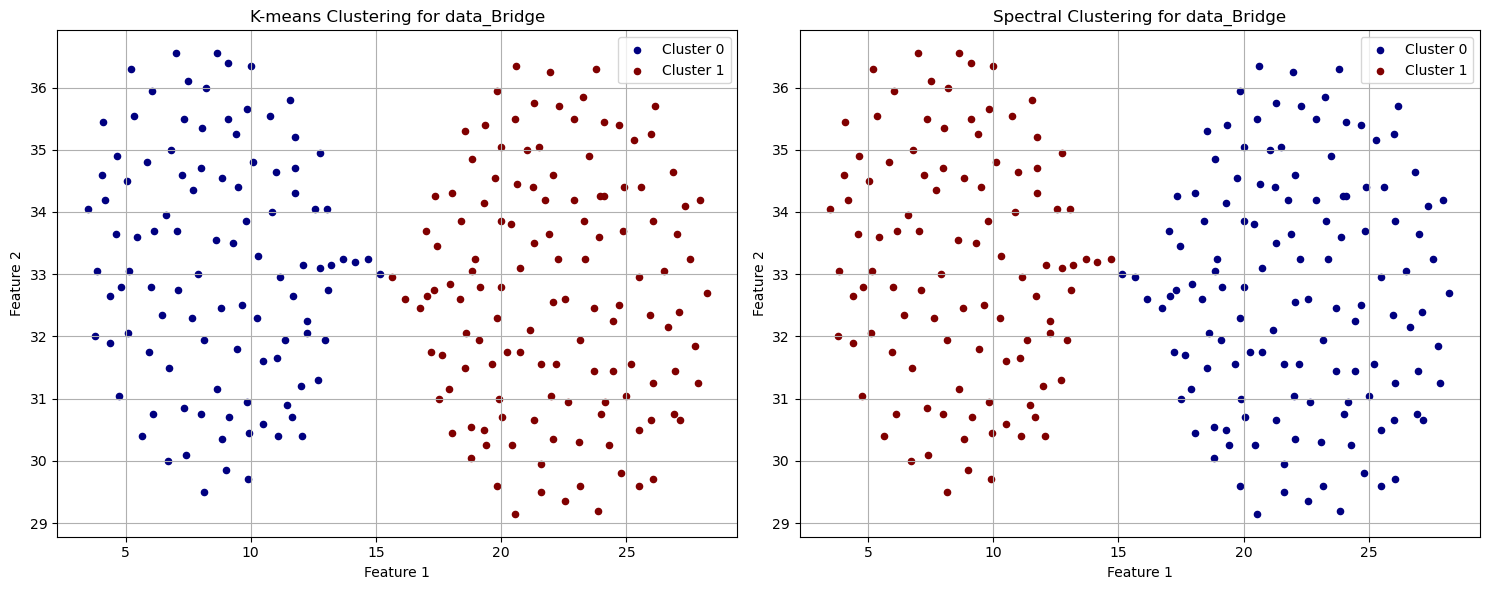

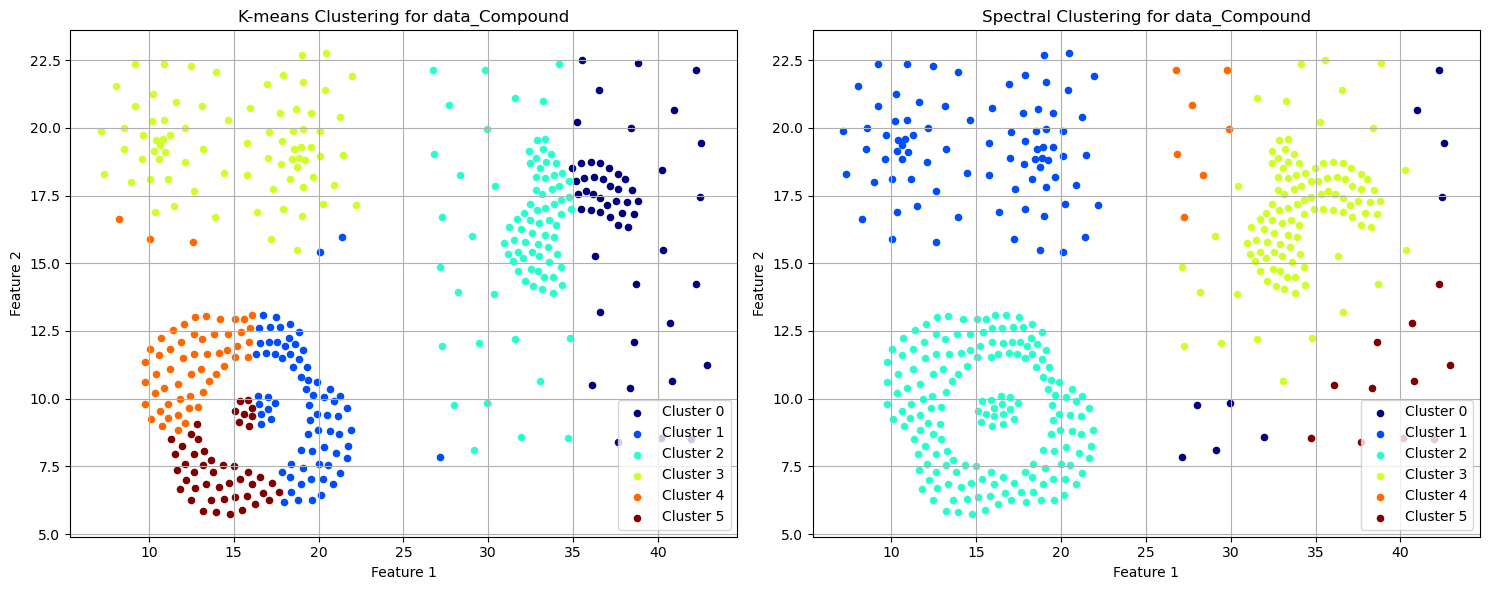

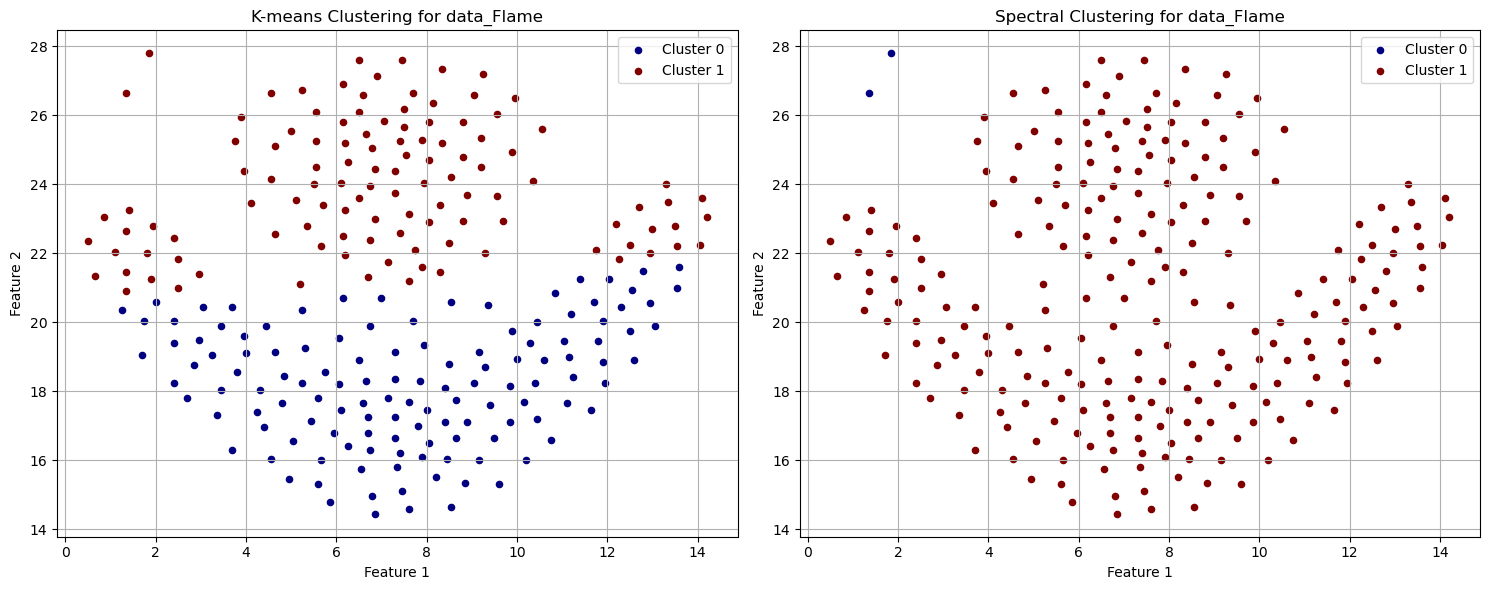

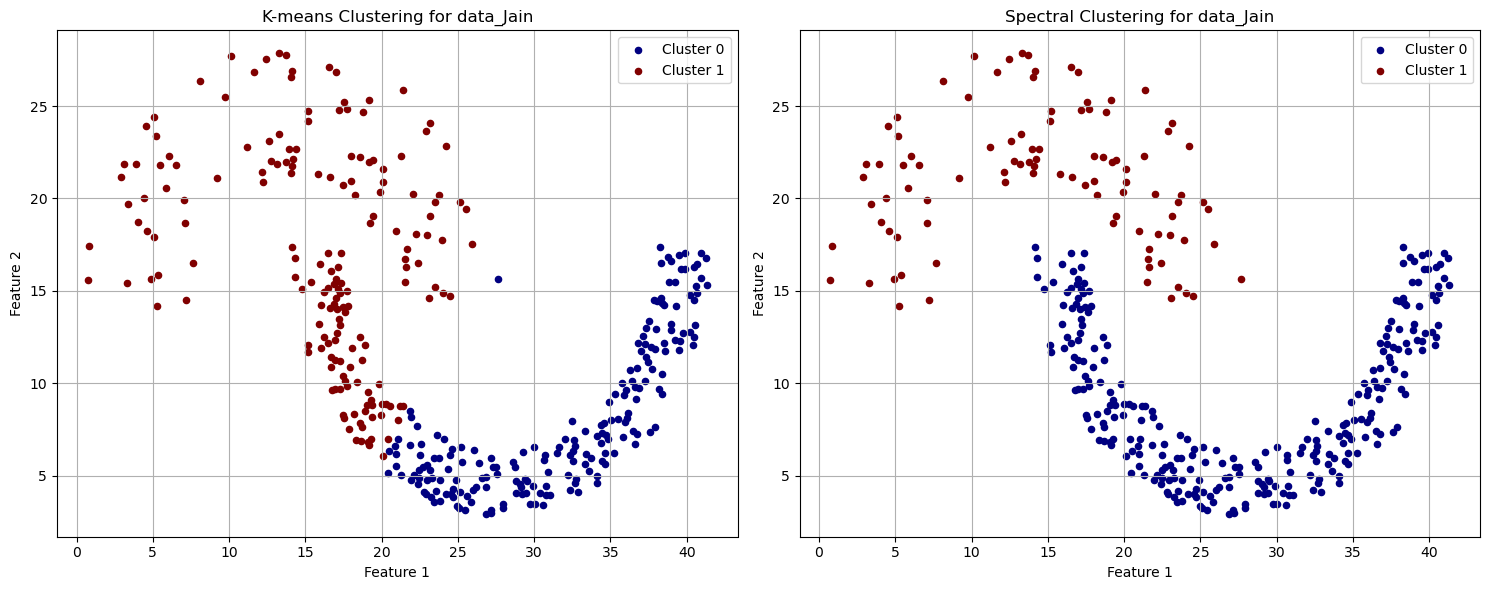

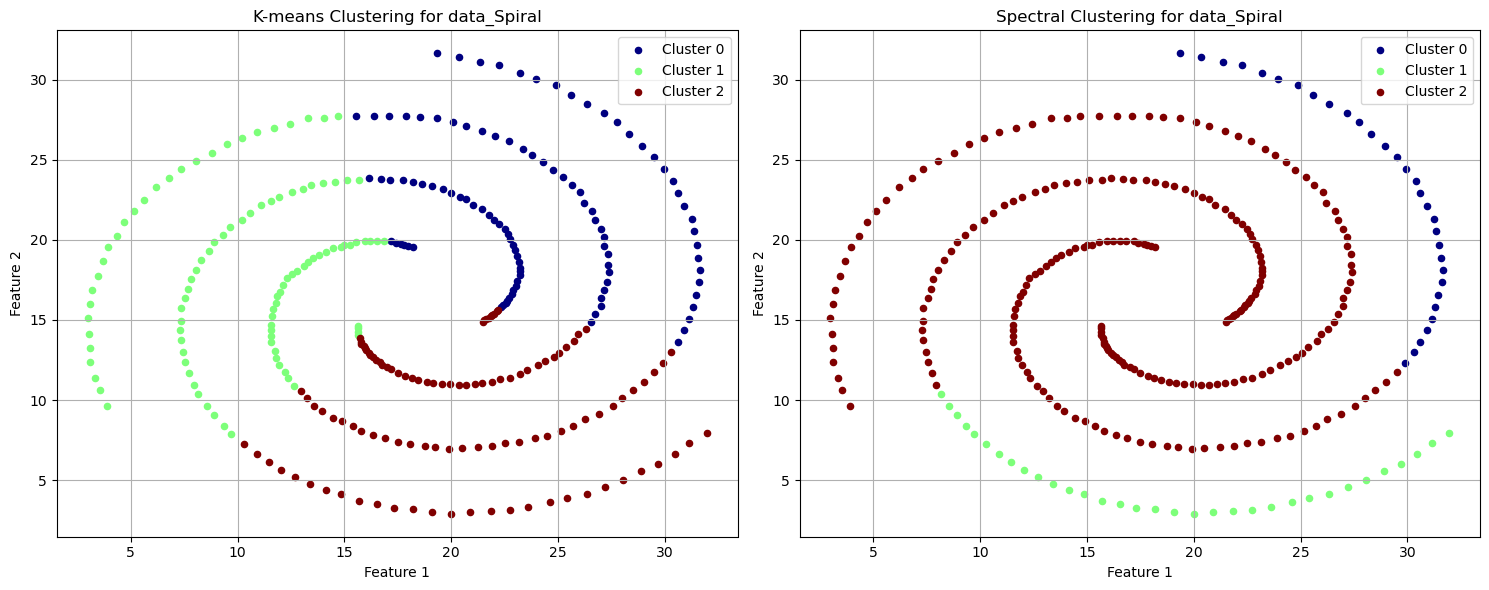

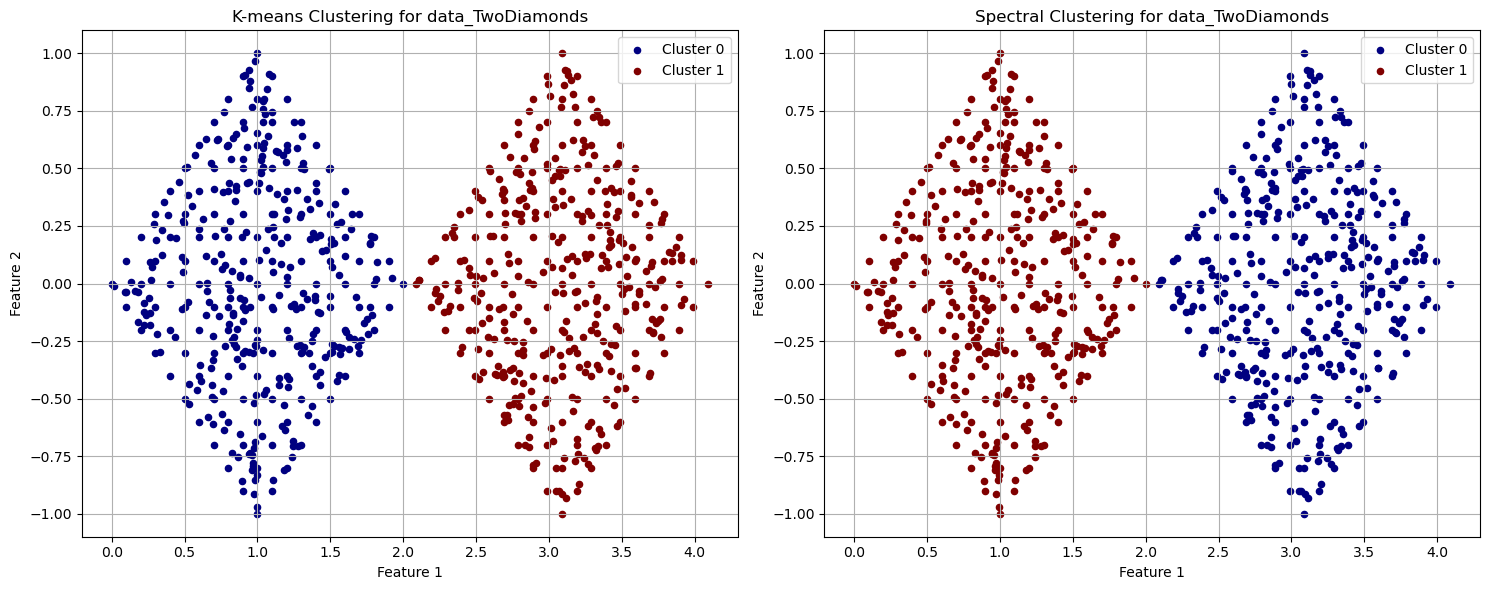

({'data_Aggregation.mat': array([5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
         6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
         6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
         6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
         6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
         6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
         6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
         6, 6, 3, 3, 3, 3, 3, 3, 6, 6, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
         3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
         3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3,
         3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0,
         0, 0, 0, 0, 0, 3, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 0, 4, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 

In [49]:
datasets = ["data_Aggregation.mat", "data_Bridge.mat", "data_Compound.mat", "data_Flame.mat", "data_Jain.mat", "data_Spiral.mat", "data_TwoDiamonds.mat"]
sigma_values = [0.5, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3]  # Sample sigma values; adjust them for best results for each dataset.
Run_clustering(datasets, sigma_values)

3. 

On the toy dataset, Spectral Clustering outperforms K-means in capturing intricate data correlations with complex, non-globular clusters. However, it requires a lot of processing power and its performance depends on choosing the right sigma values. K-means is simpler and faster, but it assumes spherical clusters, which can be inaccurate for datasets like "data_Spiral.mat." Inconsistent outcomes may also result from its centroid initialization. K-means is successful and efficient for clear, spherical clusters, however Spectral Clustering could be favored for complex data structures despite its overheads. The specific dataset structure will therefore determine the best option.